##  Data Science & Business Analytics Task - 3
-- Given by Spark Foundation in Graduate Rotational Internship Program 
##### Author : Soumyadeep Sengupta


#### OBJECTIVE:
To perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
The task is to try to find out What all security issues and insights and what all business problems can be derived by exploring the data.

- Language used: Python
- EDA


This is a simple EDA task as it involves just six variables. Data can be found at https://bit.ly/3i4rbWl . i have downloaded the CSV file and import the data


`video solution : http://www.youtube.com/watch?v=lqqdg_Z-sh4 

`Linked in Solution : https://github.com/soumyadeep28/Data-Science/tree/master/Internship_Mock_Projects/Spark_foundation `


In [2]:
# IMPORT  LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for filtering the warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# READING DATA FROM REMOTE LINK

data = pd.read_csv('SampleSuperstore.csv')

print("Data imported successfully")


data.head()

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
# DATAFRAME INFORMATION
print(data.info())
print('data frame describe: \n',data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None
data frame describe: 
         Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55

##### Data Cleaning

In [11]:
# CHECK MISSING DATA
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

we can see there are no null values in the data set so we can proceed further

In [109]:
data.shape

(9994, 13)

In [12]:
data.duplicated().sum() 

17

In [110]:
# REMOVE DUPLICATE
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [111]:
data.shape

(9977, 13)

In [20]:
print("City values: \n\n\n",data["City"].value_counts())
print("Ship values: \n\n\n",data['Ship Mode'].value_counts())
print("State values: \n\n\n",data['State'].value_counts())

City values: 


 New York City        914
Los Angeles          746
Philadelphia         536
San Francisco        506
Seattle              424
                    ... 
Cedar Rapids           1
Chapel Hill            1
Arlington Heights      1
Keller                 1
Glenview               1
Name: City, Length: 531, dtype: int64
Ship values: 


 Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64
State values: 


 California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts       

##### Data Visualisation

In [61]:
#Correlation matrix
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


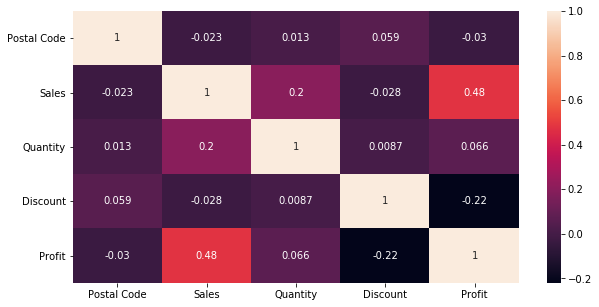

In [22]:
# heatmap : to describe the parametrers/columns how they are related to each other
plt.figure(figsize=(10,5))
sns.heatmap(data = data.corr(), annot = True)

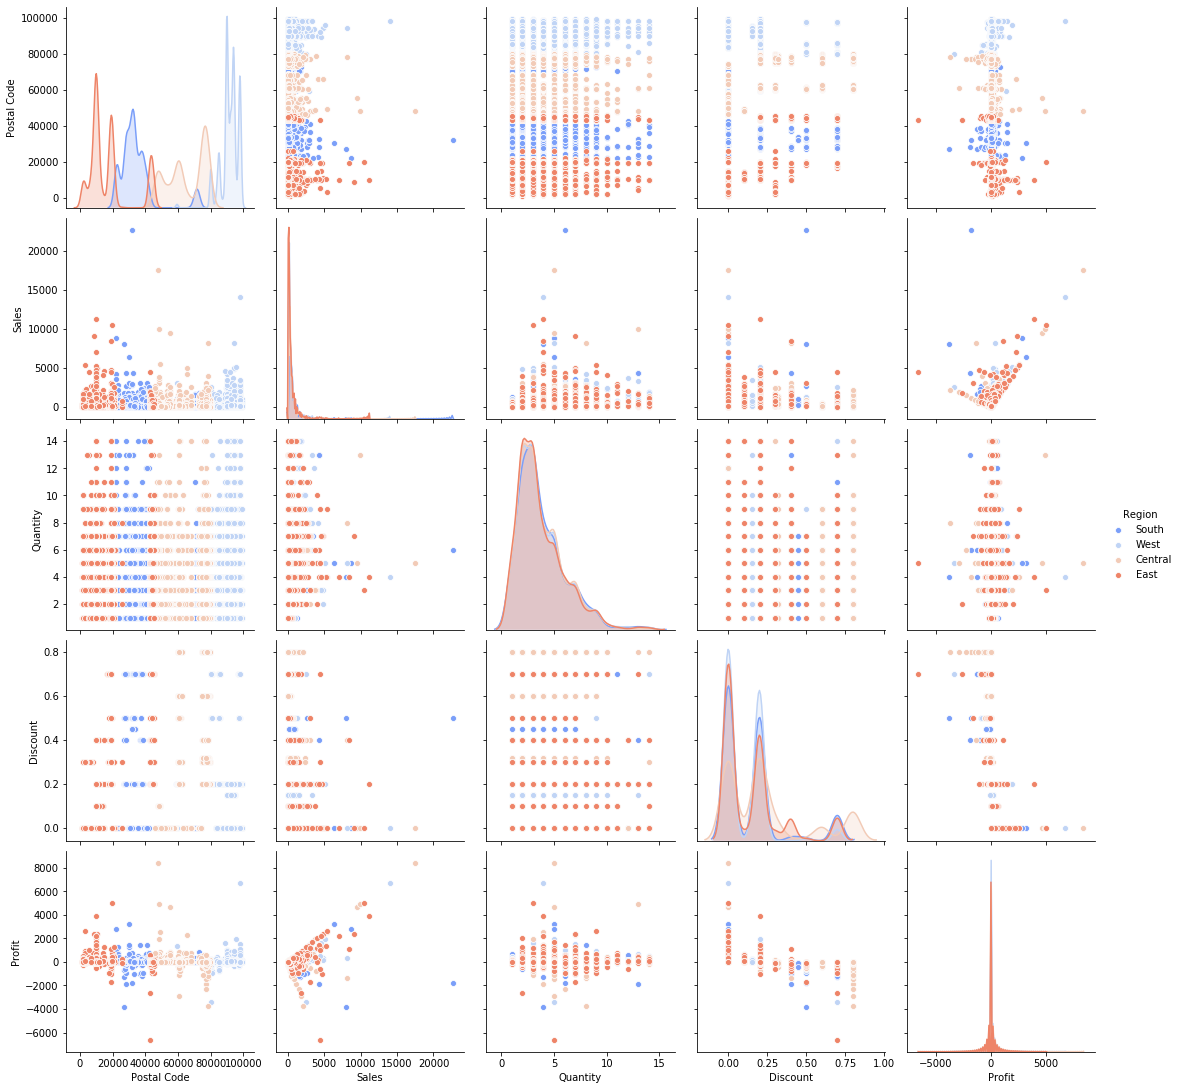

In [58]:
#based on region we have seen how the columns are segrigated 
sns.pairplot(data, hue = 'Region', palette= "coolwarm", height=3)
plt.show()

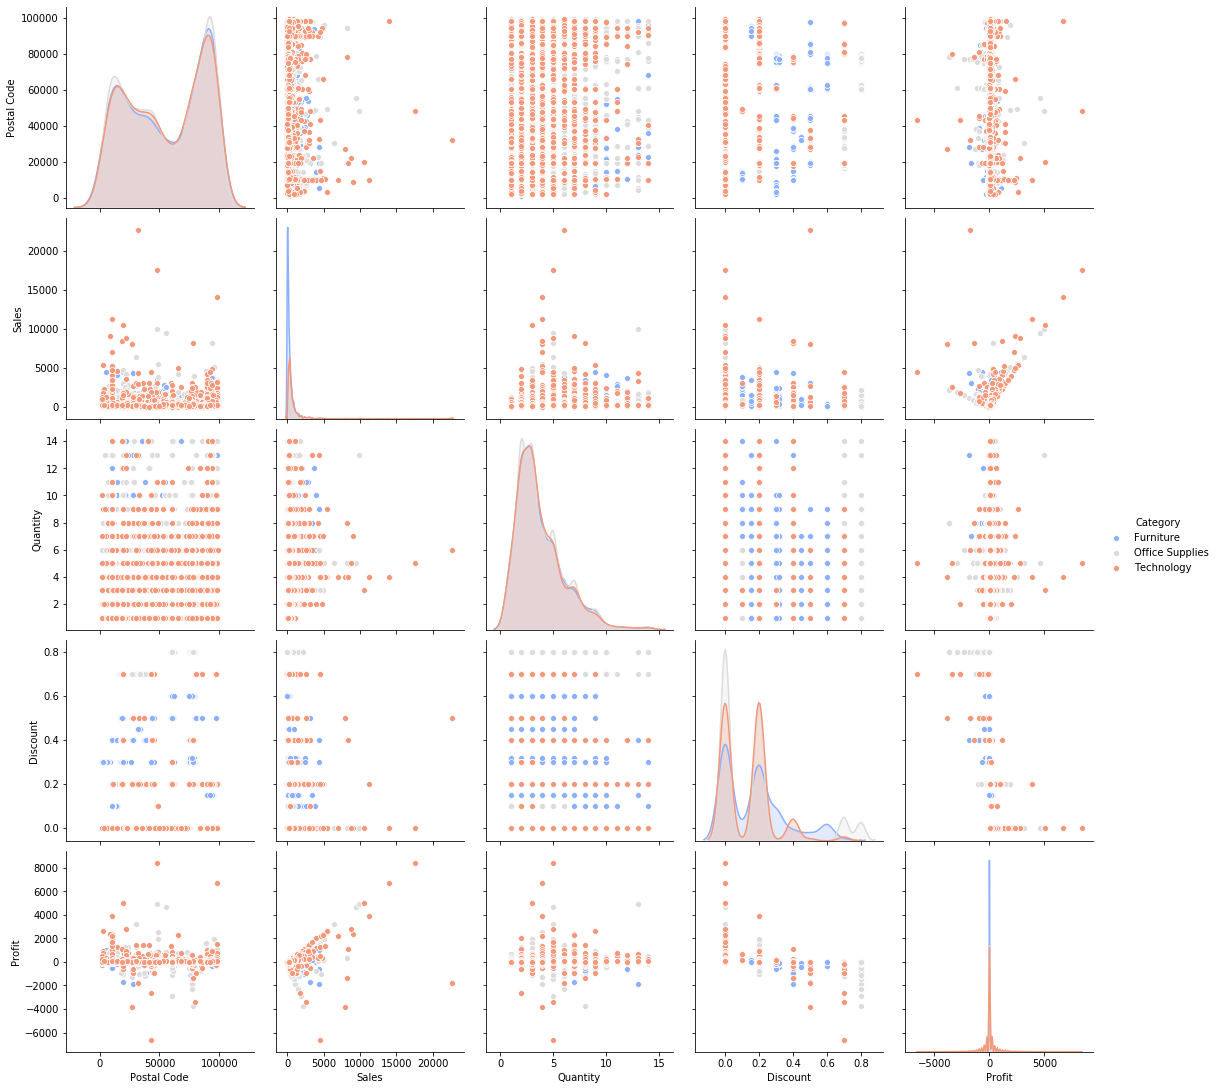

In [59]:
#based on Catagory we have seen how the columns are segrigated 
sns.pairplot(data, hue = 'Category', palette= "coolwarm", height=3)
plt.show()

In [55]:
print("TYPES of VALUES FOR CATEGORICAL DATA")

print(data["Ship Mode"].value_counts())
print("\n\n")
print(data["Category"].value_counts())
print("\n\n")
print(data["Sales"].value_counts())
print("\n\n")
print(data["Segment"].value_counts())

TYPES of VALUES FOR CATEGORICAL DATA
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64



Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64



12.960     55
19.440     37
15.552     37
10.368     35
25.920     34
           ..
14.720      1
376.866     1
572.800     1
3.928       1
629.640     1
Name: Sales, Length: 5825, dtype: int64



Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


<Figure size 432x288 with 0 Axes>

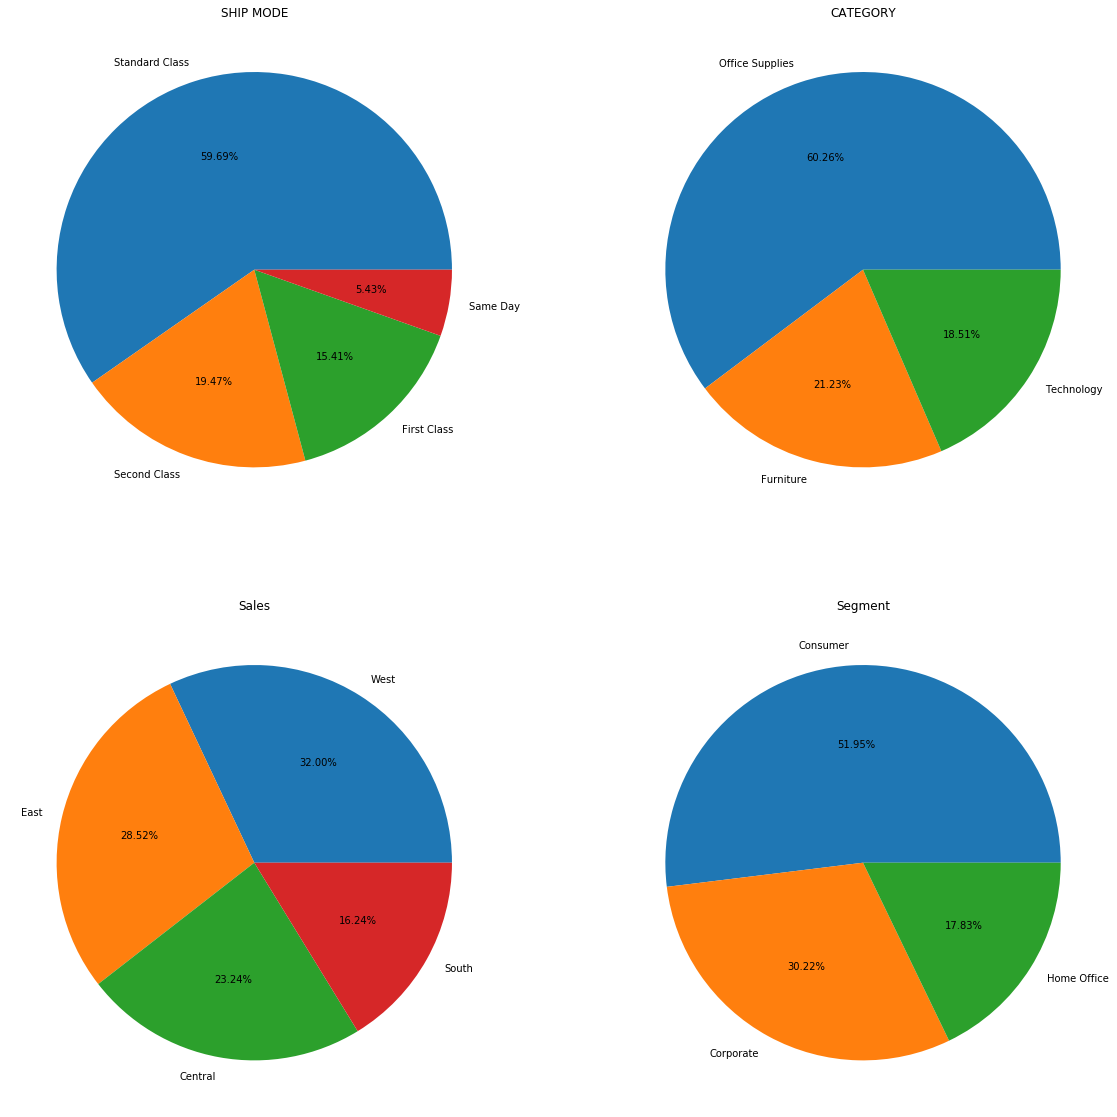

In [56]:
# PIE diagram based on ship mode



fig = plt.figure()
plt.figure(figsize = (20,20))

plt.subplot(2, 2, 1)
plt.title('SHIP MODE')
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].value_counts().index ,autopct = '%1.2f%%')


plt.subplot(2, 2, 2)
plt.title('CATEGORY')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index ,autopct = '%1.2f%%')



plt.subplot(2, 2, 3)
plt.title('Sales')
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index ,autopct = '%1.2f%%')


plt.subplot(2, 2, 4)
plt.title('Segment')
plt.pie(data['Segment'].value_counts(), labels=data['Segment'].value_counts().index ,autopct = '%1.2f%%')




plt.show()



 Based on Ship Mode:
1. Highest sales on Standard Class 
2. Lowest sales on Same Day

 Based on Category :
1. highest sales on Office Supplies
2. Lowest Sales onTechnology

 Based on Sales :
1. highest sales in West region
2. highest sales in South region

 Based on Segment :
1. highest sales in Consumer
2. highest sales in Home office

<Figure size 432x288 with 0 Axes>

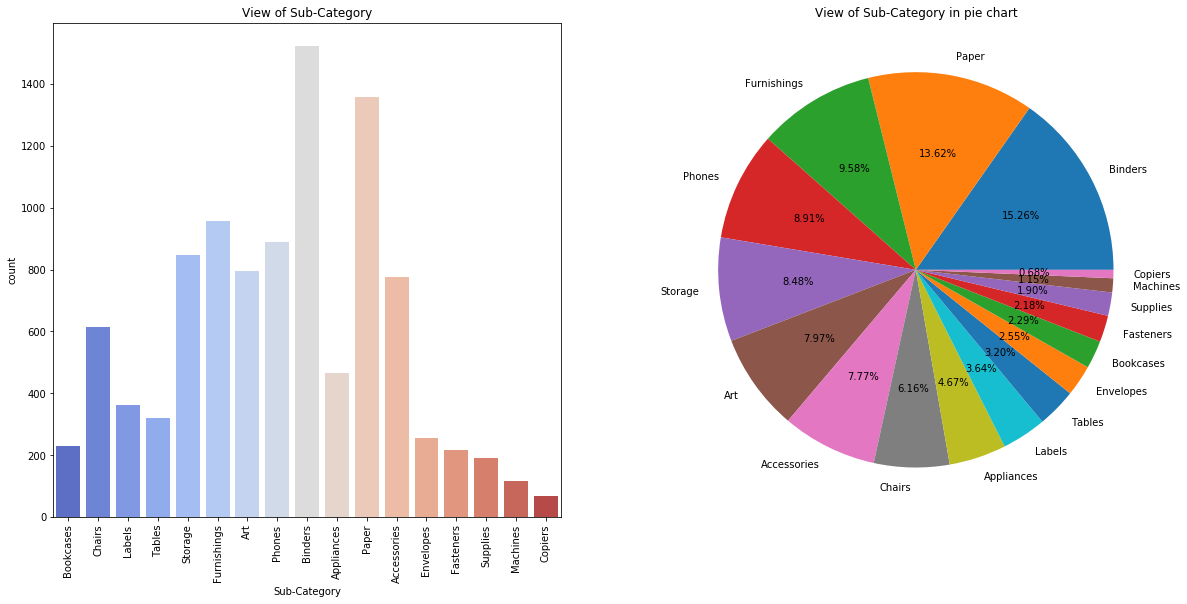

In [79]:
# Countplot for sub-category
fig = plt.figure()
plt.figure(figsize=(20,20))


plt.subplot(2, 2, 1)
sns.countplot(data["Sub-Category"] ,palette= "coolwarm")
plt.xticks(rotation=90)
plt.title("View of Sub-Category")


plt.subplot(2, 2, 2)

plt.pie(data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index ,autopct = '%1.2f%%')
plt.title("View of Sub-Category in pie chart")
plt.show()

for `Binders` Sub-Category sale is highest and `Copiers` has the lowest sales

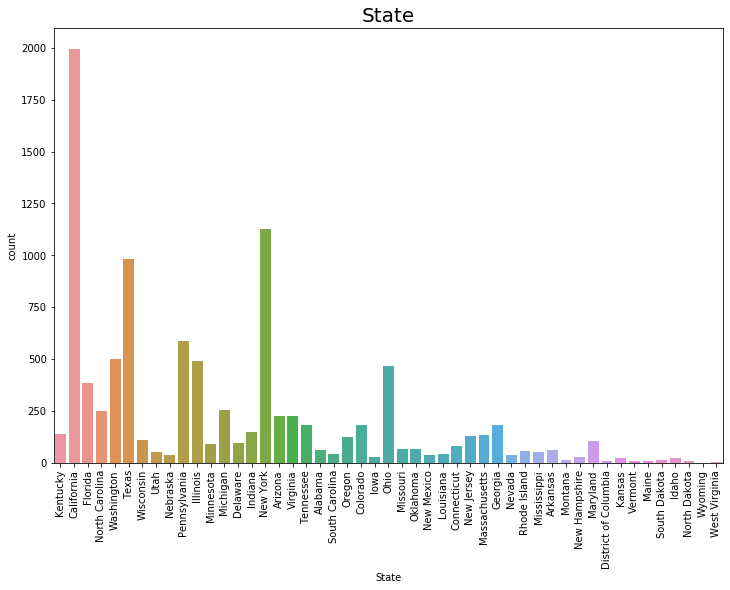

In [75]:
#Statewise sales distribustion 
plt.subplots(figsize = (12,8))
sns.countplot(x = data['State'])
plt.xticks(rotation = 90)
plt.title('State', fontsize = 20)
plt.show()

###### Outcome: 
California: Highest no.of deals <br/>
Wyoming: Lowest no.of deals

##### Statewise Sales distribution

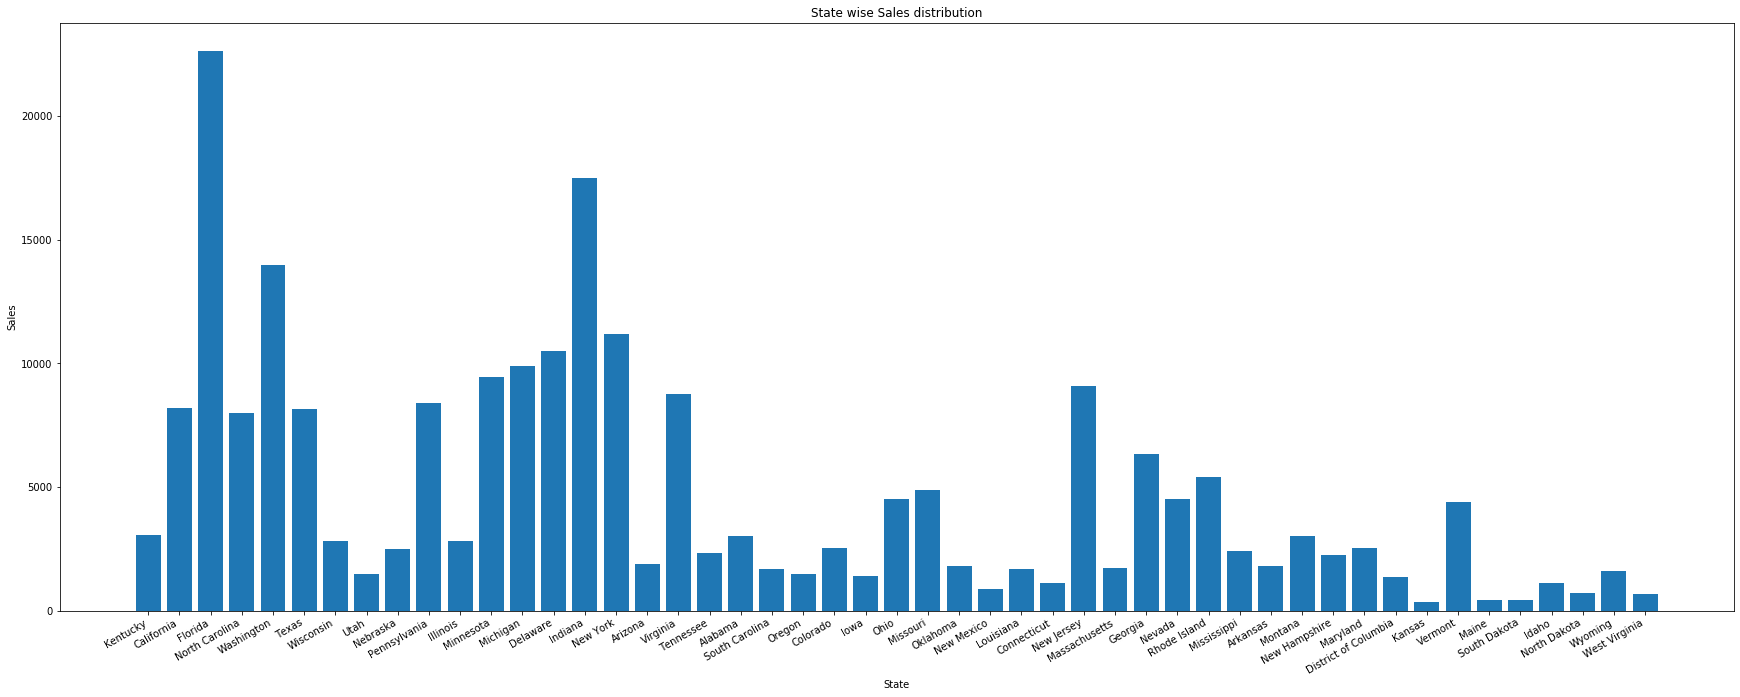

In [82]:

fig,ax=plt.subplots(figsize=(30,12))
x=data['State']
y=data['Sales']
ax.set_xlabel('State')
ax.set_ylabel('Sales')
ax.set_title('State wise Sales distribution')

fig.autofmt_xdate()
ax.bar(x,y )
plt.show()

On visualizing the data, we can see Florida has the highest sales and Kansas has lowest sales
###### State wise profit distribution

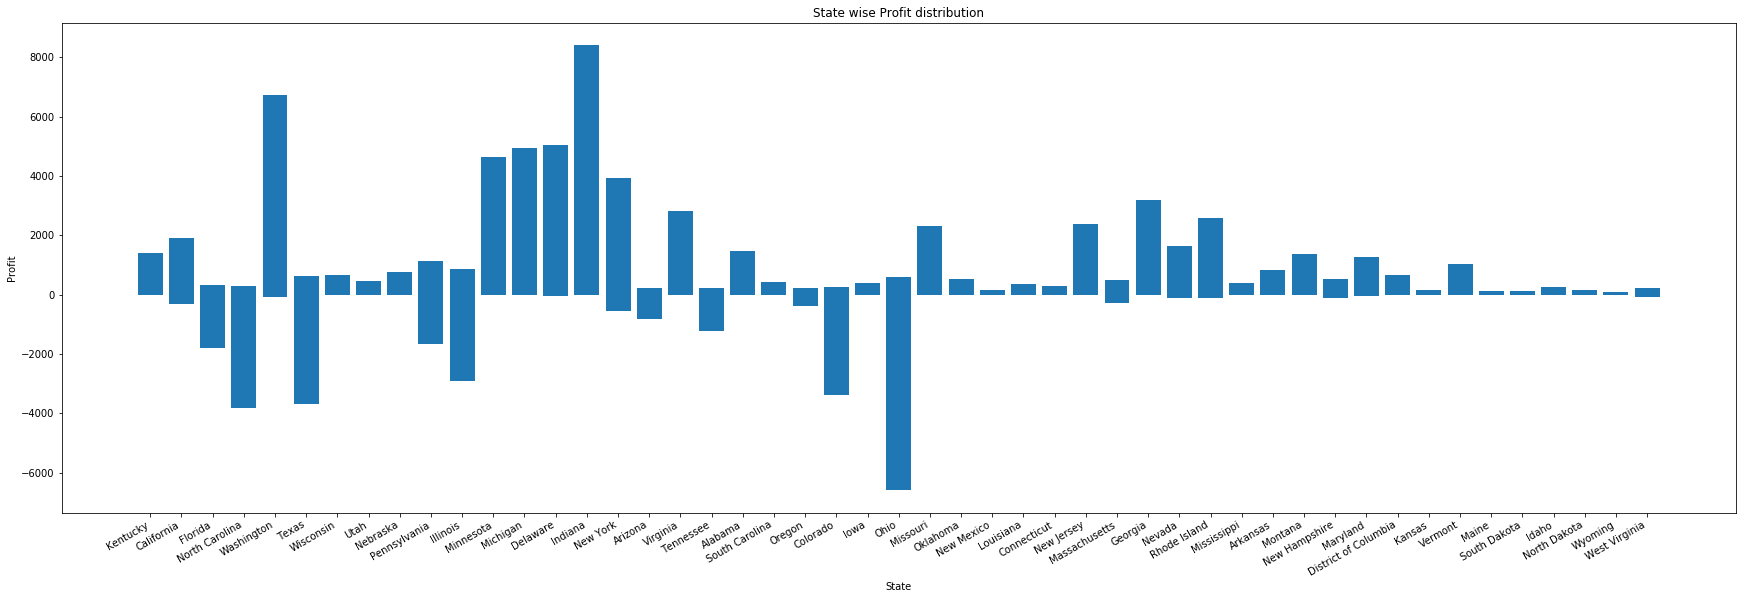

In [84]:
fig,ax=plt.subplots(figsize=(30,10))
x=data['State']
y=data['Profit']
ax.set_xlabel('State')
ax.set_ylabel('Profit')
ax.set_title('State wise Profit distribution')

fig.autofmt_xdate()
ax.bar(x,y)
plt.show()

We can see that though every state has some amount of sales, but some states has to face negative profit.
This has to be taken care of. <br/>
1. `Indiana` has highest profit 
2. `Ohio` has highest loss rate

##### Region wise category classification

Text(0.5, 1.0, 'Region wise Sales margin')

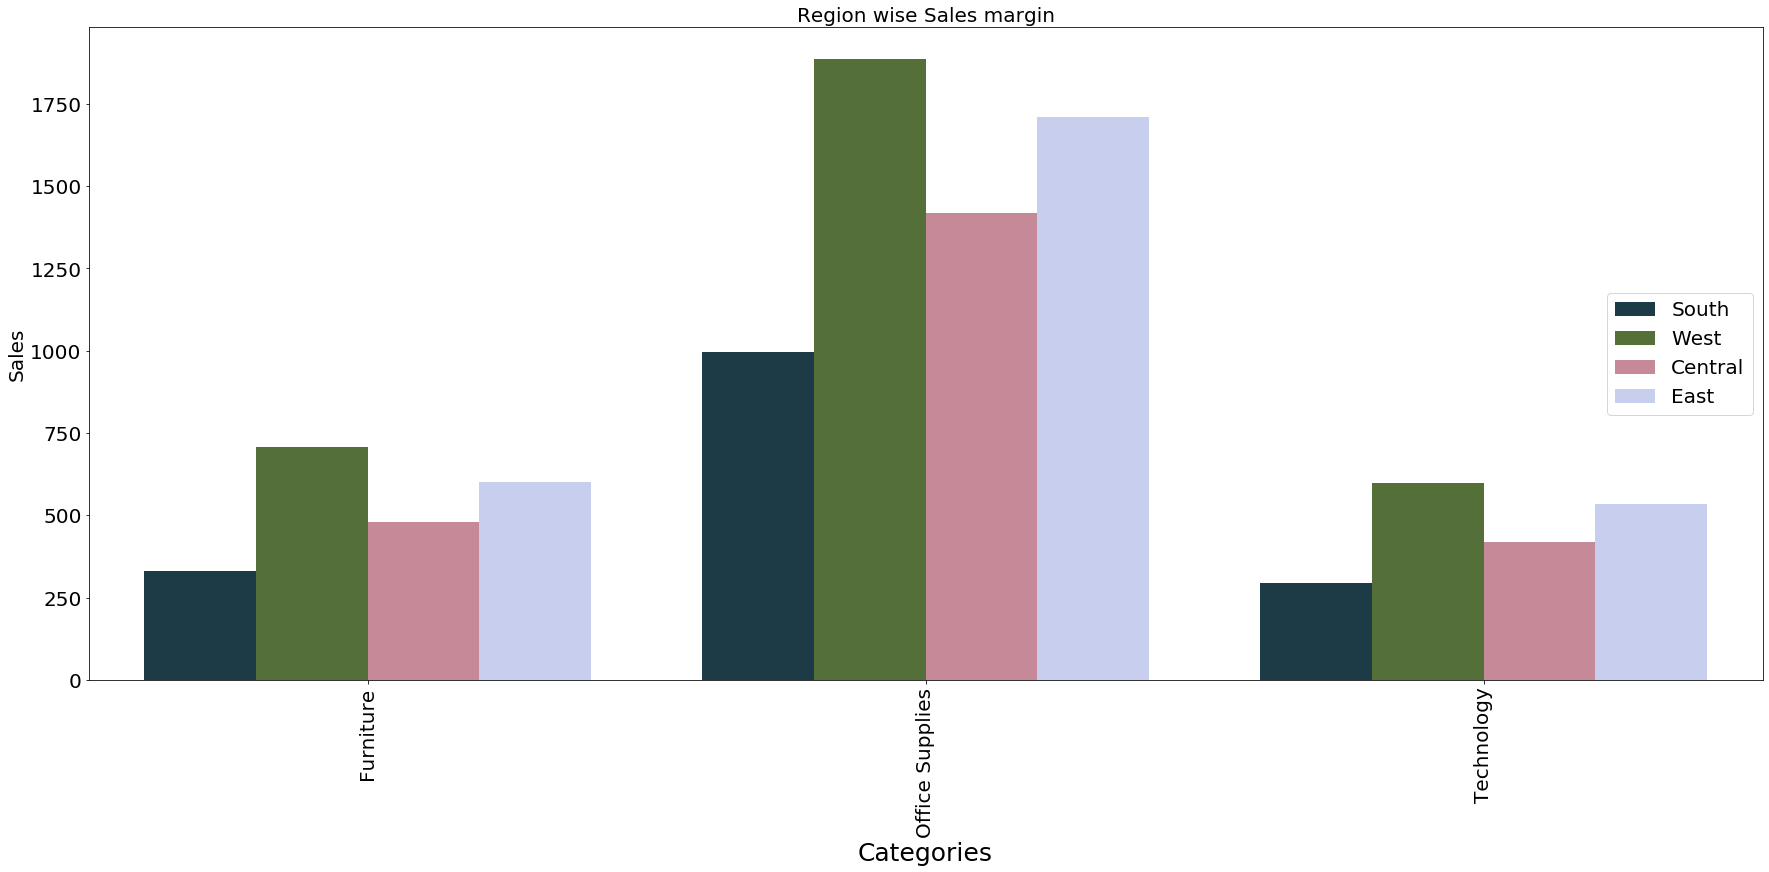

In [103]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Category', hue = 'Region', data = data, palette = "cubehelix")
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Categories', fontsize = 25)
plt.ylabel('Sales', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)
plt.title("Region wise Sales margin" , fontsize = 20)


##### Region wise sub-category classification

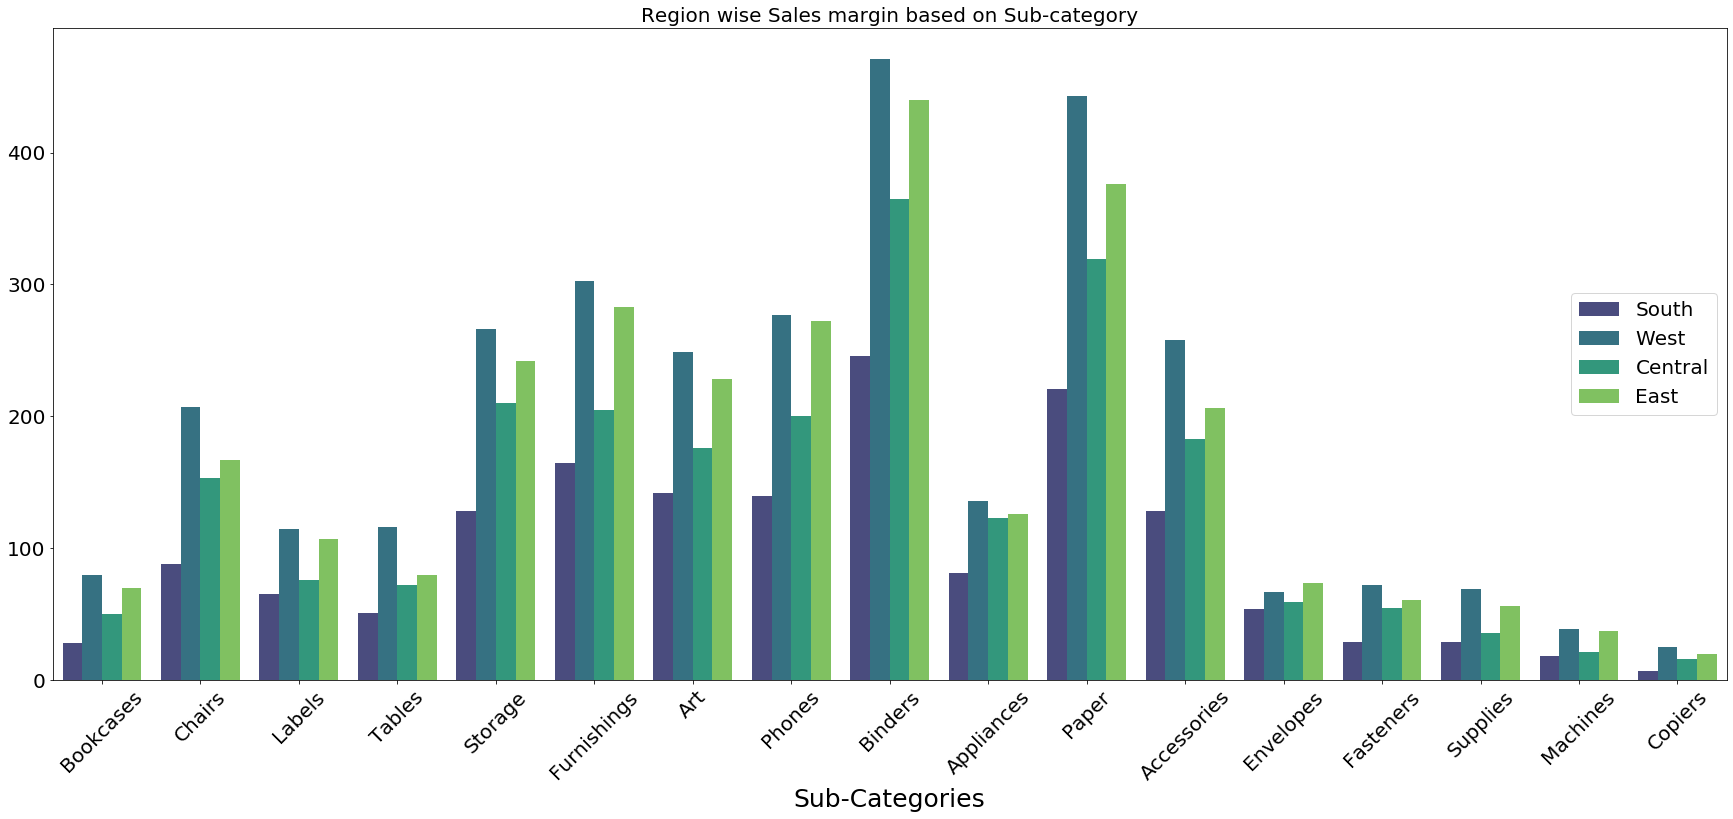

In [104]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = data, palette = 'viridis' )
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)

plt.title("Region wise Sales margin based on Sub-category" , fontsize = 20)

plt.show()

##### Graph Discount vs Quantity 

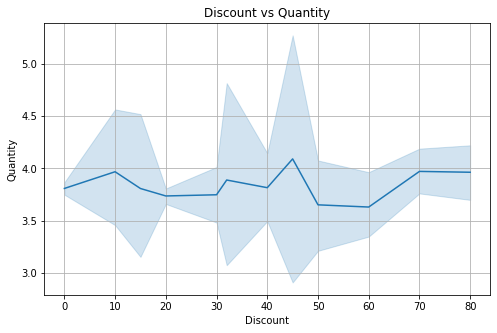

In [105]:
# line plot
plt.figure(figsize=(8,5))
sns.lineplot(x=data["Discount"]*100 ,y=data["Quantity"])
plt.title("Discount vs Quantity")
plt.grid()

##### Graph Profit vs Discount

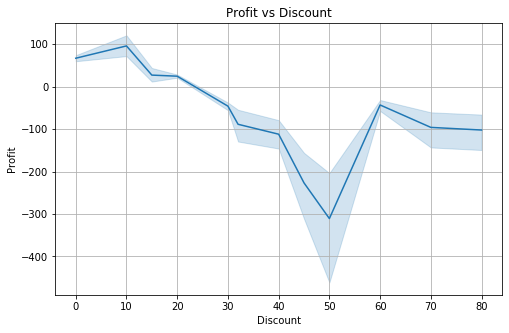

In [106]:
plt.figure(figsize=(8,5))
sns.lineplot(x=data.Discount*100 , y="Profit", data = data)
plt.title("Profit vs Discount")
plt.grid()

Insights
1. The business is most successful in New York City and Los Angeles.
2. The business should focus on 'Home Office' segment more possibly by providing targeted offers.
3. People opting for same-day deliveries are less. Possible reasons might be higher shipping charges.
4. The business should focus more on increasing sales in the Southern Region.
5. The businesses in Wyoming and West Virginia are drastically low.
6. Profit is less based on discount it has been noticed if a discount is 50% prob of loss is high and more than 20% discount will create a loss proportion high 

##### Final Conclusion:
`South region` is the weakest part in terms of sales and profit based on `Category and Sub-Category` .
for `Binders` Sub-Category sale is highest and `Copiers` has the lowest salesFurniture sector has lowest profit and the lowest sales and if we look into sub-categories we will find that . So, these are the weakest parts.